# Filtros FIR Pasa Altas. Dise침o con Ventanas

### Dise침o con ventanas cuadradas

### Importar bibliotecas y definir funciones

In [16]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [17]:
def firdesign(N, fc, sr, ftype='low', info=False):
    ft = fc/sr
    M  = N + 1
    tk = np.arange(M) - M//2
    #
    tk[M//2] = -1
    #
    sinc = np.sin(2*np.pi * ft*tk)/(np.pi*tk)
    match ftype:
        case 'low':
            sinc[M//2] = 2*ft
            tk[M//2]   = 0
        #
        case 'high':
            sinc      = -sinc
            sinc[M//2] = 1 - 2*ft
            tk[M//2]   = 0
        #
        case _:
            print('No se especifico tipo de filtro')
            sinc = np.zeros(tk.shape[0])
    #     
    if info:
        print(tk, M)
        plt.plot(ft*tk, sinc, '-o', markersize=9, linewidth=3)
        plt.grid(True)
        #
        plt.show()
    return sinc

In [18]:
def freq_hz(S, sr):
    w, h = signal.freqz(S)
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0, sr/2, H.shape[0] )
    #
    return w, W, H
#
def resp_fir(bk, sr, color='blue'):
    w, w_hz, h_hz = freq_hz(bk, sr)
    #
    plt.figure('Magnitud', figsize=(12, 4))
    plt.title('Magnitud [dB]')
    plt.grid(True)
    plt.plot(w, h_hz, linewidth=3, color=color)
    #
    plt.figure('Fase', figsize=(12, 4))
    plt.title('Fase [grados]')
    plt.plot(w, w_hz, linewidth=3, color=color)
    plt.grid(True)
    #

### Inicializaci칩n de par치metros

In [5]:
N  = 30
fc = 45
sr = 200

### Calcular coeficientes de filtros pasa altas y pasa bajas

In [19]:
cl_fir = firdesign(N, fc, sr, info=False)
ch_fir = firdesign(N, fc, sr, ftype='high', info=False)

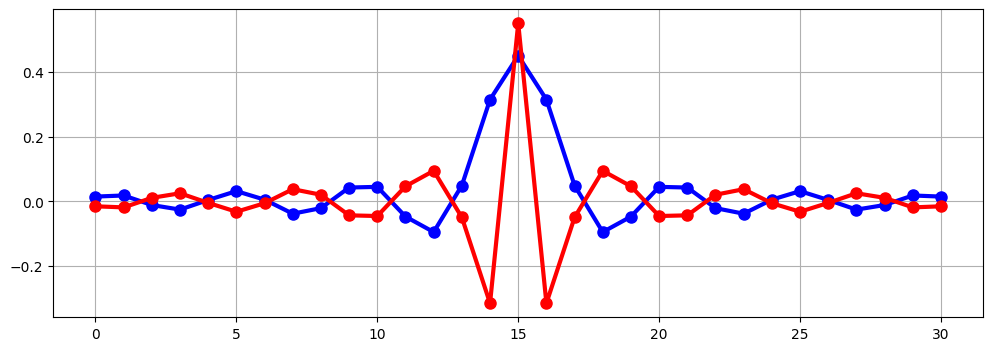

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(cl_fir, '-bo', markersize=8, linewidth=3)
plt.plot(ch_fir, '-ro', markersize=8, linewidth=3)
plt.grid(True)
plt.show()

### Respuesta en frecuencia de los filtros

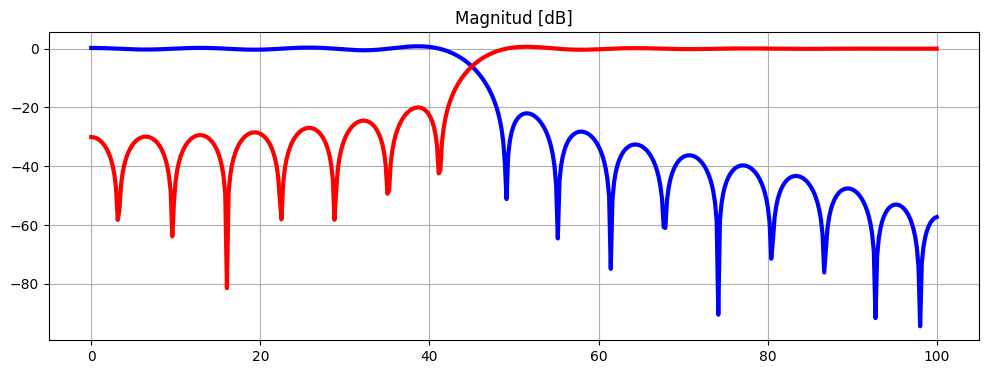

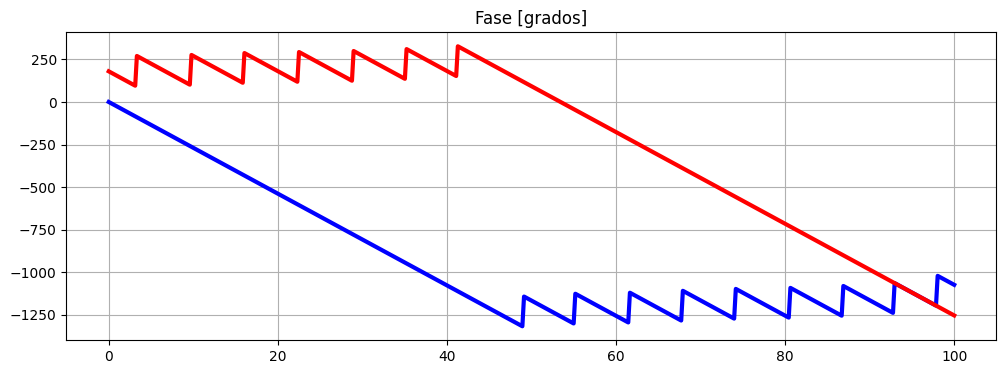

In [21]:
resp_fir(cl_fir, sr, color='blue')
resp_fir(ch_fir, sr, color='red')
plt.show()
